In [56]:
%matplotlib inline

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Preprocessing: generating a `MultiIndex` by pivoting

In [2]:
weather_data = pd.read_csv("../02. Data-Tidying-and-Cleaning/data/weather.csv")

In [3]:
weather_data.head()

,id,year,month,element,d1,d2,d3,d4,d5,d6,...,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31
0,MX17004,2010,1,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.8,NaN
1,MX17004,2010,1,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.5,NaN
2,MX17004,2010,2,tmax,NaN,27.3,24.1,NaN,NaN,NaN,...,NaN,29.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MX17004,2010,2,tmin,NaN,14.4,14.4,NaN,NaN,NaN,...,NaN,10.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MX17004,2010,3,tmax,NaN,NaN,NaN,NaN,32.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
weather_data = pd.melt(weather_data, id_vars = ["id", "year", "month", "element"], var_name = "day", value_name = "temperature")

In [5]:
weather_data.day = weather_data.day.str.slice(1).astype(int)

In [6]:
weather_data = weather_data.dropna()

In [7]:
weather_data = weather_data.pivot_table(index = ["id", "year", "month", "day"], columns = ["element"], values = ["temperature"])

In [8]:
weather_data.columns.names = [None, None]

In [9]:
weather_data[("pressure", "pmin")] = np.random.uniform(700, 800, size = len(weather_data))
weather_data[("pressure", "pmax")] = np.random.uniform(1200, 1400, size = len(weather_data))

weather_data[("humidity", "hmin")] = np.random.uniform(0.1, 0.3, size = len(weather_data))
weather_data[("humidity", "hmax")] = np.random.uniform(0.5, 1, size = len(weather_data))

weather_data.to_csv("weather_multi.csv")

## Working with `MultiIndex` datasets

In [22]:
weather_data = pd.read_csv("weather_multi.csv", index_col = [0, 1, 2, 3], header = [0, 1])

In [27]:
weather_data

temperature          pressure               humidity  \
                              tmax  tmin        pmin         pmax      hmin   
id      year month day                                                        
MX17004 2010 1     30         27.8  14.5  759.181183  1280.367202  0.290457   
             2     2          27.3  14.4  790.698645  1205.272197  0.228145   
                   3          24.1  14.4  734.852624  1310.776114  0.160650   
                   11         29.7  13.4  754.416124  1256.771934  0.104523   
                   23         29.9  10.7  722.937442  1241.732850  0.288257   
             3     5          32.1  14.2  729.708271  1231.704382  0.165004   
                   10         34.5  16.8  790.359112  1358.134282  0.146821   
                   16         31.1  17.6  702.719225  1340.003717  0.243264   
             4     27         36.3  16.7  794.906064  1345.573162  0.211068   
             5     27         33.2  18.2  752.340962  1294.151715  0.212973   
             6     17         28.0  17.5  725.113732  1364.944239  0.101948   
                   29         30.1  18.0  722.706348  1336.183455  0.292241   
             7     3          28.6  17.5  777.804853  1260.039905  0.116859   
                   14         29.9  16.5  739.035932  1239.976535  0.274592   
             8     5          29.6  15.8  772.832830  1365.680525  0.172151   
                   8          29.0  17.3  790.217228  1239.600551  0.130676   
                   13         29.8  16.5  729.134049  1310.069663  0.217087   
                   23         26.4  15.0  737.867600  1308.682244  0.141859   
                   25         29.7  15.6  706.351989  1206.840595  0.125606   
                   29         28.0  15.3  766.820391  1225.402443  0.131565   
                   31         25.4  15.4  739.573138  1348.214861  0.202740   
             10    5          27.0  14.0  787.024807  1292.662881  0.118742   
                   7          28.1  12.9  725.969426  1352.915705  0.254321   
                   14         29.5  13.0  732.395812  1236.976639  0.182804   
                   15         28.7  10.5  723.380475  1345.258171  0.285443   
                   28         31.2  15.0  756.349196  1246.353281  0.136586   
             11    2          31.3  16.3  739.692538  1299.577187  0.168876   
                   4          27.2  12.0  707.191403  1236.187612  0.138159   
                   5          26.3   7.9  756.708244  1306.160740  0.288282   
                   26         28.1  12.1  746.406565  1382.683241  0.134919   
                   27         27.7  14.2  786.210991  1288.939075  0.237576   
             12    1          29.9  13.8  789.282118  1364.550688  0.185693   
                   6          27.8  10.5  732.256717  1311.777074  0.220551   

                                  
                            hmax  
id      year month day            
MX17004 2010 1     30   0.922970  
             2     2    0.526420  
                   3    0.561271  
                   11   0.613515  
                   23   0.889415  
             3     5    0.743714  
                   10   0.723156  
                   16   0.551665  
             4     27   0.812884  
             5     27   0.981923  
             6     17   0.522551  
                   29   0.684969  
             7     3    0.689613  
                   14   0.518588  
             8     5    0.591879  
                   8    0.697199  
                   13   0.901742  
                   23   0.879142  
                   25   0.854684  
                   29   0.844863  
                   31   0.619172  
             10    5    0.692760  
                   7    0.735543  
                   14   0.873477  
                   15   0.835398  
                   28   0.785080  
             11    2    0.987860  
                   4    0.882614  
                   5    0.654625  
                   26   0.767665  
                   27  

In [24]:
weather_data.shape

(33, 6)

In [25]:
weather_data.columns

MultiIndex([('temperature', 'tmax'),
            ('temperature', 'tmin'),
            (   'pressure', 'pmin'),
            (   'pressure', 'pmax'),
            (   'humidity', 'hmin'),
            (   'humidity', 'hmax')],
           )

In [26]:
weather_data.index

MultiIndex([('MX17004', 2010,  1, 30),
            ('MX17004', 2010,  2,  2),
            ('MX17004', 2010,  2,  3),
            ('MX17004', 2010,  2, 11),
            ('MX17004', 2010,  2, 23),
            ('MX17004', 2010,  3,  5),
            ('MX17004', 2010,  3, 10),
            ('MX17004', 2010,  3, 16),
            ('MX17004', 2010,  4, 27),
            ('MX17004', 2010,  5, 27),
            ('MX17004', 2010,  6, 17),
            ('MX17004', 2010,  6, 29),
            ('MX17004', 2010,  7,  3),
            ('MX17004', 2010,  7, 14),
            ('MX17004', 2010,  8,  5),
            ('MX17004', 2010,  8,  8),
            ('MX17004', 2010,  8, 13),
            ('MX17004', 2010,  8, 23),
            ('MX17004', 2010,  8, 25),
            ('MX17004', 2010,  8, 29),
            ('MX17004', 2010,  8, 31),
            ('MX17004', 2010, 10,  5),
            ('MX17004', 2010, 10,  7),
            ('MX17004', 2010, 10, 14),
            ('MX17004', 2010, 10, 15),
            ('MX17004', 2

In [37]:
weather_data[[("temperature", "tmax"), ("pressure", "pmax"), ("humidity", "hmax")]]

temperature     pressure  humidity
                              tmax         pmax      hmax
id      year month day                                   
MX17004 2010 1     30         27.8  1280.367202  0.922970
             2     2          27.3  1205.272197  0.526420
                   3          24.1  1310.776114  0.561271
                   11         29.7  1256.771934  0.613515
                   23         29.9  1241.732850  0.889415
             3     5          32.1  1231.704382  0.743714
                   10         34.5  1358.134282  0.723156
                   16         31.1  1340.003717  0.551665
             4     27         36.3  1345.573162  0.812884
             5     27         33.2  1294.151715  0.981923
             6     17         28.0  1364.944239  0.522551
                   29         30.1  1336.183455  0.684969
             7     3          28.6  1260.039905  0.689613
                   14         29.9  1239.976535  0.518588
             8     5          29.6  1365.680525  0.591879
                   8          29.0  1239.600551  0.697199
                   13         29.8  1310.069663  0.901742
                   23         26.4  1308.682244  0.879142
                   25         29.7  1206.840595  0.854684
                   29         28.0  1225.402443  0.844863
                   31         25.4  1348.214861  0.619172
             10    5          27.0  1292.662881  0.692760
                   7          28.1  1352.915705  0.735543
                   14         29.5  1236.976639  0.873477
                   15         28.7  1345.258171  0.835398
                   28         31.2  1246.353281  0.785080
             11    2          31.3  1299.577187  0.987860
                   4          27.2  1236.187612  0.882614
                   5          26.3  1306.160740  0.654625
                   26         28.1  1382.683241  0.767665
                   27         27.7  1288.939075  0.607982
             12    1          29.9  1364.550688  0.685203
                   6          27.8  1311.777074  0.704210

In [50]:
weather_data[weather_data[("pressure", "pmax")] > 1300]

temperature          pressure               humidity  \
                              tmax  tmin        pmin         pmax      hmin   
id      year month day                                                        
MX17004 2010 2     3          24.1  14.4  734.852624  1310.776114  0.160650   
             3     10         34.5  16.8  790.359112  1358.134282  0.146821   
                   16         31.1  17.6  702.719225  1340.003717  0.243264   
             4     27         36.3  16.7  794.906064  1345.573162  0.211068   
             6     17         28.0  17.5  725.113732  1364.944239  0.101948   
                   29         30.1  18.0  722.706348  1336.183455  0.292241   
             8     5          29.6  15.8  772.832830  1365.680525  0.172151   
                   13         29.8  16.5  729.134049  1310.069663  0.217087   
                   23         26.4  15.0  737.867600  1308.682244  0.141859   
                   31         25.4  15.4  739.573138  1348.214861  0.202740   
             10    7          28.1  12.9  725.969426  1352.915705  0.254321   
                   15         28.7  10.5  723.380475  1345.258171  0.285443   
             11    5          26.3   7.9  756.708244  1306.160740  0.288282   
                   26         28.1  12.1  746.406565  1382.683241  0.134919   
             12    1          29.9  13.8  789.282118  1364.550688  0.185693   
                   6          27.8  10.5  732.256717  1311.777074  0.220551   

                                  
                            hmax  
id      year month day            
MX17004 2010 2     3    0.561271  
             3     10   0.723156  
                   16   0.551665  
             4     27   0.812884  
             6     17   0.522551  
                   29   0.684969  
             8     5    0.591879  
                   13   0.901742  
                   23   0.879142  
                   31   0.619172  
             10    7    0.735543  
                   15   0.835398  
             11    5    0.654625  
                   26   0.767665  
             12    1    0.685203  
                   6    0.704210

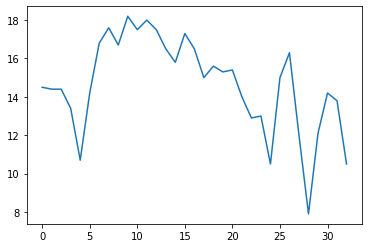

In [62]:
plt.plot(weather_data[("temperature", "tmin")].tolist())